In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nishanthardy","key":"f6bd6610310a710d2803039bd24af844"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                  66KB  2024-06-12 23:09:20           3296         62  1.0              
mayankanand2701/samsung-stock-price-dataset                     Samsung Stock Price Dataset 📱🏭📈                  114KB  2024-06-13 14:51:11           1098         29  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26          10856        195  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Stream

In [ ]:
! kaggle datasets download -d jainilcoder/online-payment-fraud-detection-dataset

403 - Forbidden - Permission 'datasets.get' was denied


In [ ]:
! kaggle datasets download -d jainilcoder/online-payment-fraud-detection

Dataset URL: https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection
License(s): CC0-1.0
 97% 172M/178M [00:02<00:00, 80.0MB/s]
100% 178M/178M [00:02<00:00, 69.9MB/s]


In [ ]:
! unzip online-payment-fraud-detection.zip

Archive:  online-payment-fraud-detection.zip
  inflating: onlinefraud.csv         


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('onlinefraud.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
n,m=df.shape #m=df.shape[1]
df.shape

(6362620, 11)

In [ ]:
for i in range(m):
    column_name = df.columns[i]
    print(f"Column: {column_name}")
    print(df.iloc[:, i].isnull().value_counts())
    print("\n")

Column: step
step
False    6362620
Name: count, dtype: int64


Column: type
type
False    6362620
Name: count, dtype: int64


Column: amount
amount
False    6362620
Name: count, dtype: int64


Column: nameOrig
nameOrig
False    6362620
Name: count, dtype: int64


Column: oldbalanceOrg
oldbalanceOrg
False    6362620
Name: count, dtype: int64


Column: newbalanceOrig
newbalanceOrig
False    6362620
Name: count, dtype: int64


Column: nameDest
nameDest
False    6362620
Name: count, dtype: int64


Column: oldbalanceDest
oldbalanceDest
False    6362620
Name: count, dtype: int64


Column: newbalanceDest
newbalanceDest
False    6362620
Name: count, dtype: int64


Column: isFraud
isFraud
False    6362620
Name: count, dtype: int64


Column: isFlaggedFraud
isFlaggedFraud
False    6362620
Name: count, dtype: int64




Removing the non-usable features

In [ ]:
df.drop(['isFlaggedFraud','nameOrig','nameDest'],axis=1,inplace=True)

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
df.dropna()
df.drop_duplicates()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
# prompt: get category of type with max isFraud = 1

most_fraudulent_type = df.groupby('type')['isFraud'].sum().sort_values(ascending=False).index[0]
print(f"Category with the most fraud: {most_fraudulent_type}")


Category with the most fraud: CASH_OUT


We will one-hot encode the type column

In [ ]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [ ]:
type_dummies = pd.get_dummies(df['type']).astype('int')

In [ ]:
df = pd.concat([df,type_dummies], axis=1)
df.drop('type', axis=1, inplace=True)


In [ ]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


Find the correlation between independent columns

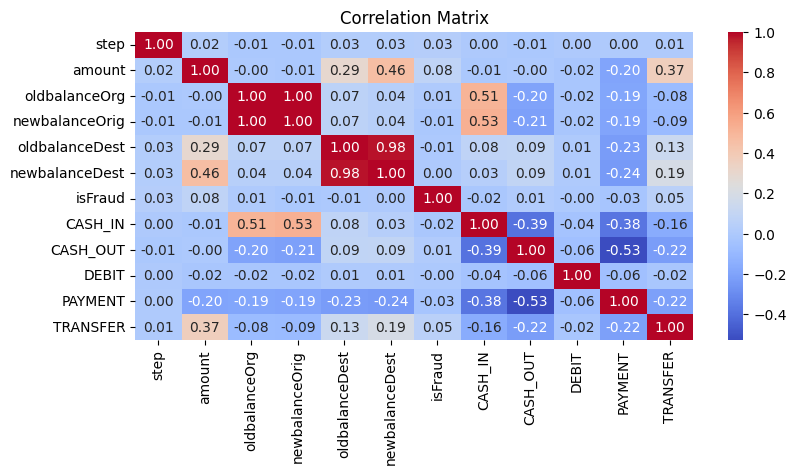

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
corr=df.corr()
plt.figure(figsize=(9,4))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

We can see that 'oldbalanceOrg','oldbalanceDest'are too much correlated. So we can drop them.

In [ ]:
df.drop(columns=['oldbalanceOrg','oldbalanceDest'],inplace=True)

In [ ]:
df.head()

,step,amount,newbalanceOrig,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,160296.36,0.0,0,0,0,0,1,0
1,1,1864.28,19384.72,0.0,0,0,0,0,1,0
2,1,181.00,0.00,0.0,1,0,0,0,0,1
3,1,181.00,0.00,0.0,1,0,1,0,0,0
4,1,11668.14,29885.86,0.0,0,0,0,0,1,0


Now, we split the dataset

In [ ]:
y=df['isFraud']
x=df.loc[:,df.columns!='isFraud']

In [ ]:
print(x.shape,y.shape)

(6362620, 9) (6362620,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_, y_train, y_ = train_test_split(x,y,test_size=0.4, random_state=42)

In [ ]:
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.5,random_state=42)

Applying logistic regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_cv = scaler.transform(x_cv)
x_test = scaler.transform(x_test)

In [ ]:
# Instantiate the model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions
y_pred = logreg.predict(x_cv)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_cv, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_cv, y_pred))

# Accuracy score
accuracy = accuracy_score(y_cv, y_pred)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
[[1270898      30]
 [   1477     119]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270928
           1       0.80      0.07      0.14      1596

    accuracy                           1.00   1272524
   macro avg       0.90      0.54      0.57   1272524
weighted avg       1.00      1.00      1.00   1272524


Accuracy Score: 0.9988157394280972


In [ ]:
# prompt: check if the model is overfitting

# Calculate the training and cross-validation accuracy
y_pred_train = logreg.predict(x_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_cv = accuracy_score(y_cv, y_pred)

# Compare the training and cross-validation accuracy
if accuracy_train > accuracy_cv:
  print("\nThe model is overfitting.")
else:
  print("\nThe model is not overfitting.")



The model is not overfitting.


In [ ]:
# prompt: get the error after applying x_train and x_cv on the model

# Calculate the error after applying x_train and x_cv on the model
error_train = np.mean(np.abs(y_train - logreg.predict(x_train)))
error_cv = np.mean(np.abs(y_cv - logreg.predict(x_cv)))

# Print the errors
print("Error on training set:", error_train)
print("Error on cross-validation set:", error_cv)


Error on training set: 0.0012083596589664845
Error on cross-validation set: 0.0011842605719027696


This means our model is working good

In [ ]:
# prompt: find the accuracy on x_test

y_pred_test = logreg.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on test set:", accuracy_test)


Accuracy on test set: 0.9987858775158661


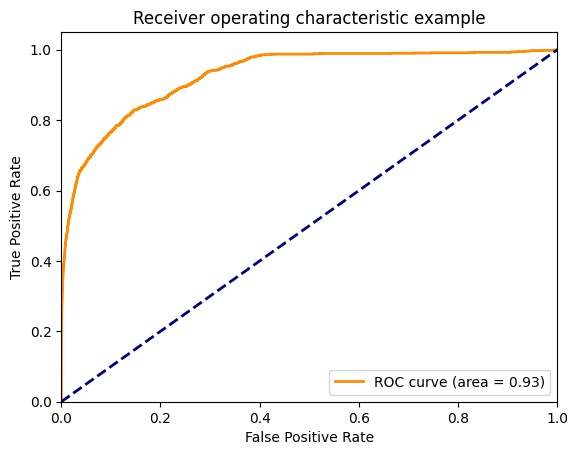

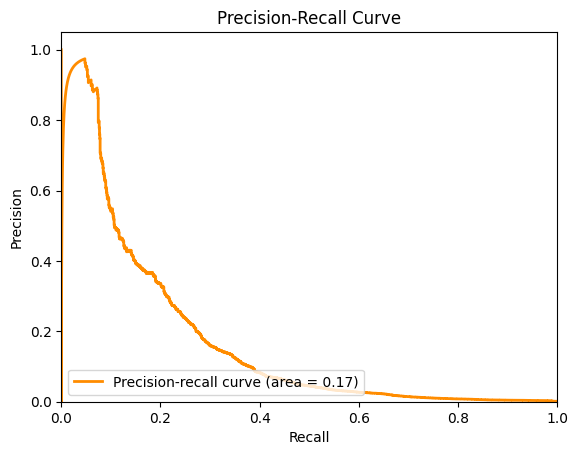

In [ ]:
# prompt: plot roc and pr curve

from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
probs = logreg.predict_proba(x_cv)[:, 1]
fpr, tpr, thresholds = roc_curve(y_cv, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Calculate precision-recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_cv, probs)
pr_auc = auc(recall, precision)

# Plot PR curve
plt.figure()
lw = 2
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='Precision-recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


Now we will implement Random Forest classifier and see the results


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270928
           1       0.94      0.67      0.78      1596

    accuracy                           1.00   1272524
   macro avg       0.97      0.84      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524


Accuracy Score: 0.9995355686808265
Error on training set: 1.0477863940745583e-06
Error on cross-validation set: 0.000464431319173548


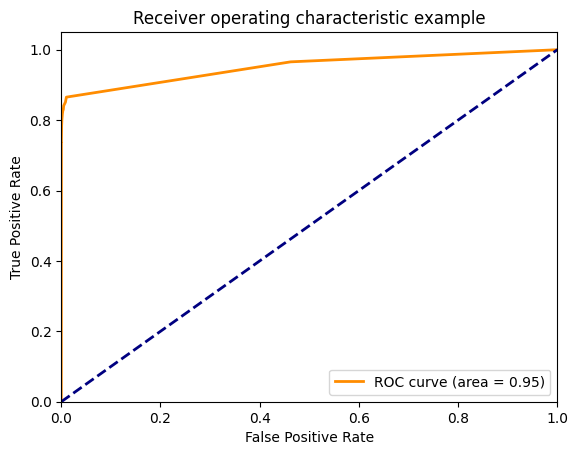

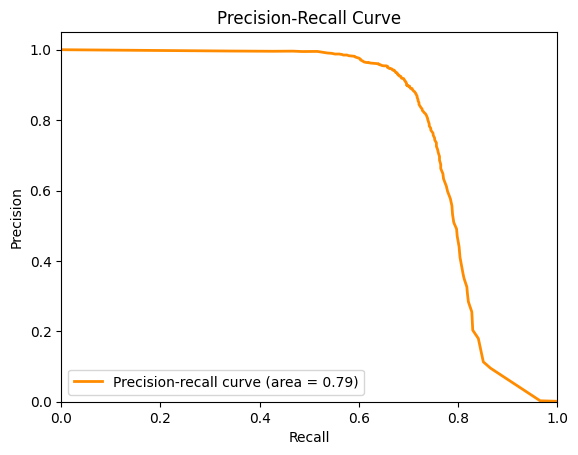

In [ ]:
# prompt: implement the random forest classifer

from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rfc = RandomForestClassifier(random_state=42)

# Train the model
rfc.fit(x_train, y_train)

# Make predictions
y_pred = rfc.predict(x_cv)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_cv, y_pred))

# Calculate the accuracy score
accuracy = accuracy_score(y_cv, y_pred)
print("\nAccuracy Score:", accuracy)

# Calculate the error after applying x_train and x_cv on the model
error_train = np.mean(np.abs(y_train - rfc.predict(x_train)))
error_cv = np.mean(np.abs(y_cv - rfc.predict(x_cv)))

# Print the errors
print("Error on training set:", error_train)
print("Error on cross-validation set:", error_cv)

# Calculate ROC curve and AUC
probs = rfc.predict_proba(x_cv)[:, 1]
fpr, tpr, thresholds = roc_curve(y_cv, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Calculate precision-recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_cv, probs)
pr_auc = auc(recall, precision)

# Plot PR curve
plt.figure()
lw = 2
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='Precision-recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


We can see that the model is overfitting

So, we will try tuning the hyperparameter using RandomizedSearhCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data

rand_search.fit(x_train, y_train)

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Now, we will use XGBoost

In [ ]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(x_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(x_cv, y_cv, enable_categorical=True)

NameError: name 'x_train' is not defined

In [ ]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(x_train, y_train, enable_categorical=True)
dcv_reg = xgb.DMatrix(x_cv, y_cv, enable_categorical=True)

In [ ]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "hist"}#gpu_hist for gpu

In [ ]:
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=100,
)

In [ ]:
from sklearn.metrics import mean_squared_error

preds = model.predict(dcv_reg)

In [ ]:
# prompt: now, evaluate the accuracy of the xgboost model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

y_pred_xgb = np.where(preds > 0.5, 1, 0)
accuracy_xgb = accuracy_score(y_cv, y_pred_xgb)
print("Accuracy of XGBoost model:", accuracy_xgb)

Accuracy of XGBoost model: 0.9994813457349331


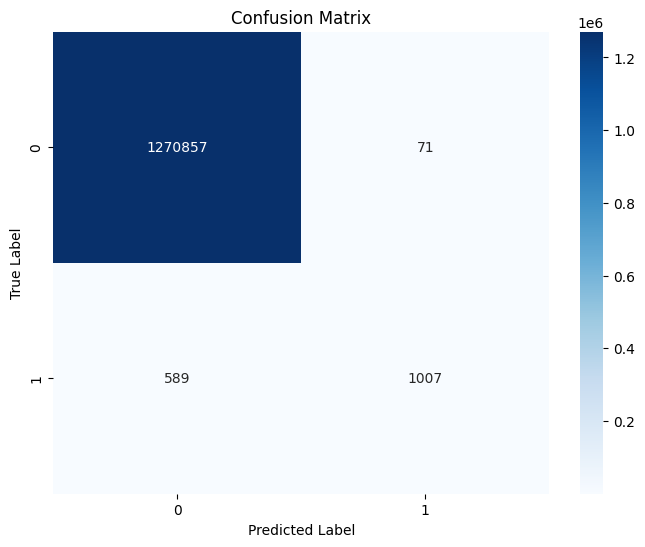

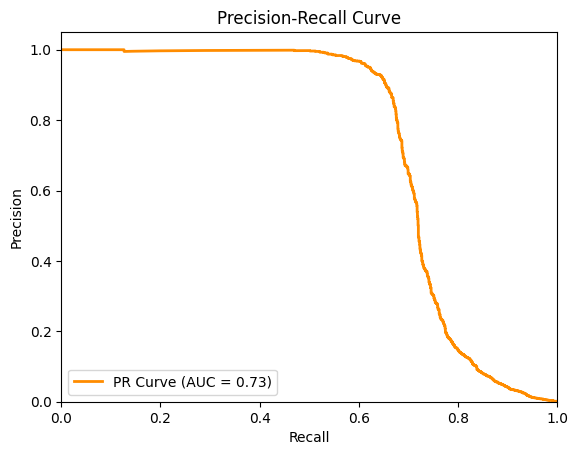

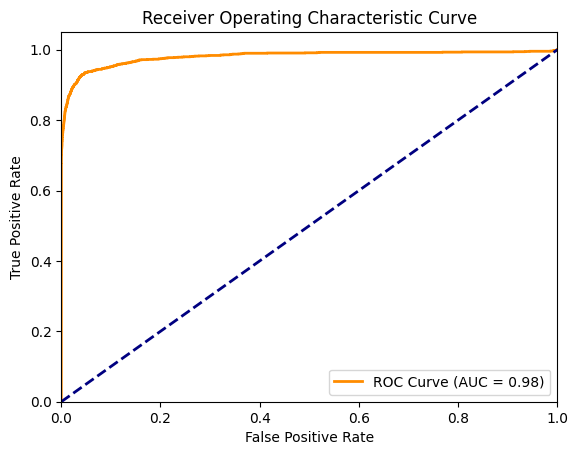

Error on training set: 0.0011005896
Error on cross-validation set: 0.001151702


In [ ]:
# prompt: plot confusion matrix, pr curve, roc curve and find the errors on train and test set from the model

from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_cv, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Calculate the precision-recall curve
precision, recall, _ = precision_recall_curve(y_cv, preds)

# Calculate the PR AUC
pr_auc = auc(recall, precision)

# Plot the PR curve
plt.figure()
lw = 2
plt.plot(recall, precision, color="darkorange", lw=lw, label="PR Curve (AUC = %0.2f)" % pr_auc)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_cv, preds)

# Calculate the ROC AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC Curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

# Calculate the error on the train and test sets
error_train = np.mean(np.abs(y_train - model.predict(dtrain_reg)))
error_cv = np.mean(np.abs(y_cv - model.predict(dcv_reg)))

# Print the errors
print("Error on training set:", error_train)
print("Error on cross-validation set:", error_cv)


So, XGBoost is a good model. It is not overfitting.

Now, we will use Light Gradient Boosting Model

In [ ]:
! pip install --upgrade lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [ ]:
from sklearn import metrics
import lightgbm as lgb
from sklearn.metrics import accuracy_score, log_loss

model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42,verbosity=20)
model.fit(x_train,y_train,eval_set=[(x_cv,y_cv),(x_train,y_train)],eval_metric='logloss')

[LightGBM] [Info] Number of positive: 4947, number of negative: 3812625
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.897360
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.299120
[LightGBM] [Debug] init for col-wise cost 0.511367 seconds, init for row-wise cost 0.888117 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.704943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 3817572, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001296 -> initscore=-6.647292
[LightGBM] [Info] Start training from score -6.647292
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 13
[Ligh

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42, verbosity=20)

Accuracy of LightGBM model: 0.9985752724506571


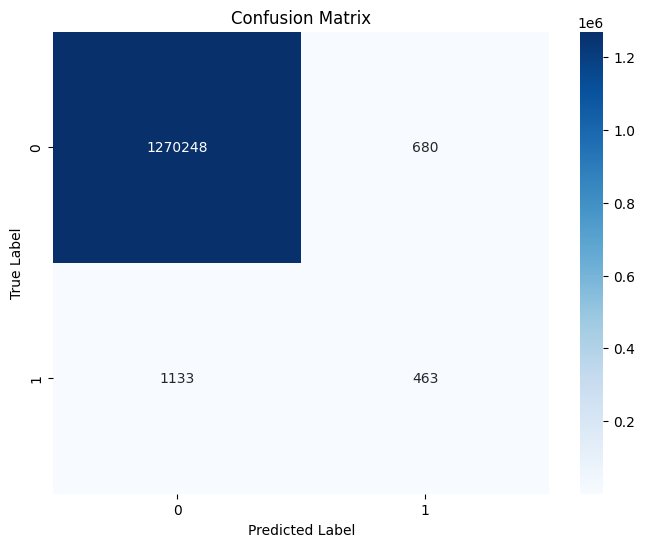

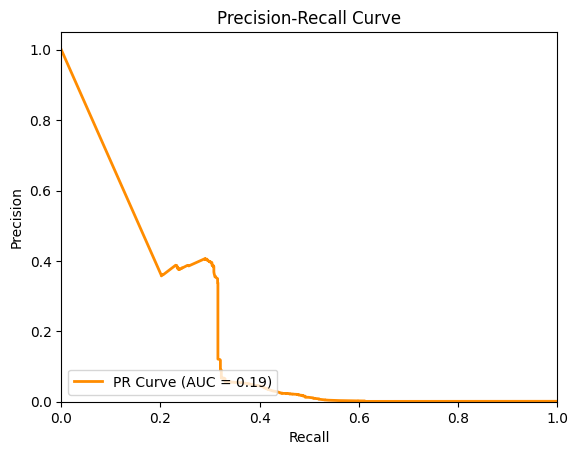

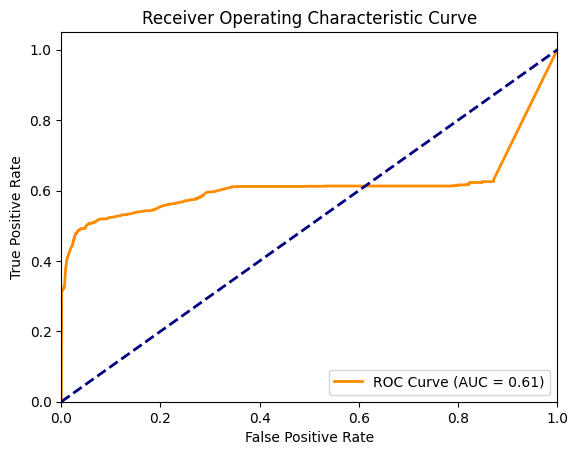

Error on training set: 0.0014155594183947284
Error on cross-validation set: 0.0014247275493428808


In [ ]:
# prompt: find the accuracy , plot the pr curve and roc curve and find the errors on train and cv set from the model

y_pred_lgb = model.predict(x_cv)
accuracy_lgb = accuracy_score(y_cv, y_pred_lgb)
print("Accuracy of LightGBM model:", accuracy_lgb)

# Calculate the confusion matrix
cm = confusion_matrix(y_cv, y_pred_lgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Calculate the precision-recall curve
precision, recall, _ = precision_recall_curve(y_cv, model.predict_proba(x_cv)[:, 1])

# Calculate the PR AUC
pr_auc = auc(recall, precision)

# Plot the PR curve
plt.figure()
lw = 2
plt.plot(recall, precision, color="darkorange", lw=lw, label="PR Curve (AUC = %0.2f)" % pr_auc)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_cv, model.predict_proba(x_cv)[:, 1])

# Calculate the ROC AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC Curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

# Calculate the error on the train and test sets
error_train = np.mean(np.abs(y_train - model.predict(x_train)))
error_cv = np.mean(np.abs(y_cv - model.predict(x_cv)))

# Print the errors
print("Error on training set:", error_train)
print("Error on cross-validation set:", error_cv)


The LGBM model works good and it does not overfit.

Now, we will try neural network

Epoch 1/10
119300/119300 [==============================] - 393s 3ms/step - loss: 0.0200 - accuracy: 0.9987 - val_loss: 0.0193 - val_accuracy: 0.9987
Epoch 2/10
119300/119300 [==============================] - 334s 3ms/step - loss: 0.0200 - accuracy: 0.9987 - val_loss: 0.0193 - val_accuracy: 0.9987
Epoch 3/10
119300/119300 [==============================] - 361s 3ms/step - loss: 0.0200 - accuracy: 0.9987 - val_loss: 0.0193 - val_accuracy: 0.9987
Epoch 4/10
119300/119300 [==============================] - 359s 3ms/step - loss: 0.0200 - accuracy: 0.9987 - val_loss: 0.0193 - val_accuracy: 0.9987
Epoch 5/10
119300/119300 [==============================] - 361s 3ms/step - loss: 0.0200 - accuracy: 0.9987 - val_loss: 0.0193 - val_accuracy: 0.9987
Epoch 6/10
119300/119300 [==============================] - 367s 3ms/step - loss: 0.0200 - accuracy: 0.9987 - val_loss: 0.0193 - val_accuracy: 0.9987
Epoch 7/10
119300/119300 [==============================] - 332s 3ms/step - loss: 0.0200 - accuracy:

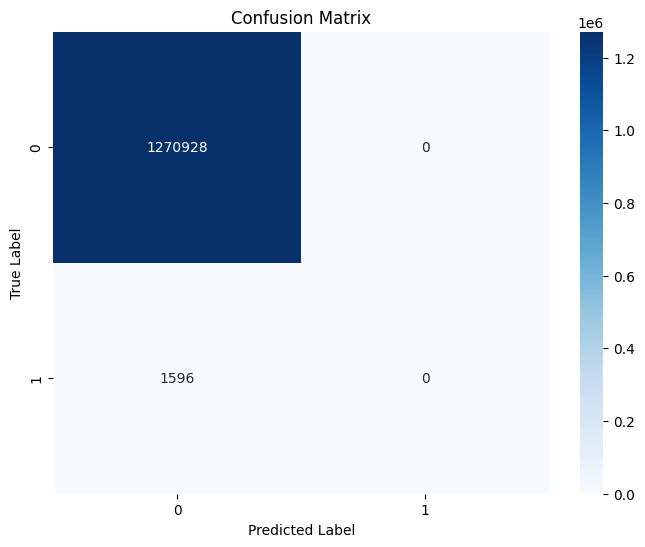

NameError: name 'precision_recall_curve' is not defined

In [ ]:
# prompt: setup neural network with adam optimizer,is_logits=true, relu activation

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(x_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="linear", dtype=tf.float32)
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_cv, y_cv))

# Evaluate the model on the test set
y_pred_nn = model.predict(x_cv)
y_pred_nn = np.where(y_pred_nn > 0.5, 1, 0)
accuracy_nn = accuracy_score(y_cv, y_pred_nn)
print("Accuracy of neural network model:", accuracy_nn)

# Calculate the confusion matrix
cm = confusion_matrix(y_cv, y_pred_nn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


39767/39767 [==============================] - 71s 2ms/step


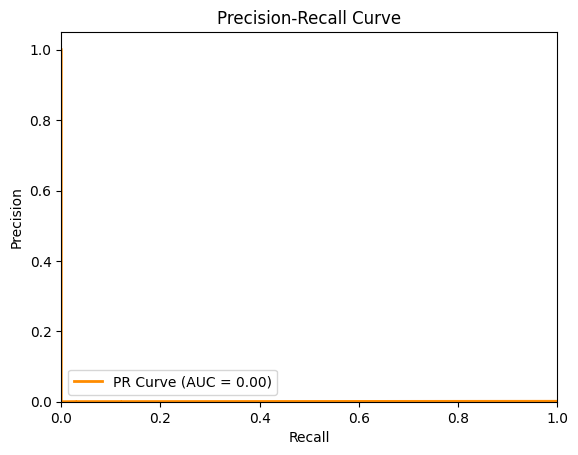

39767/39767 [==============================] - 64s 2ms/step


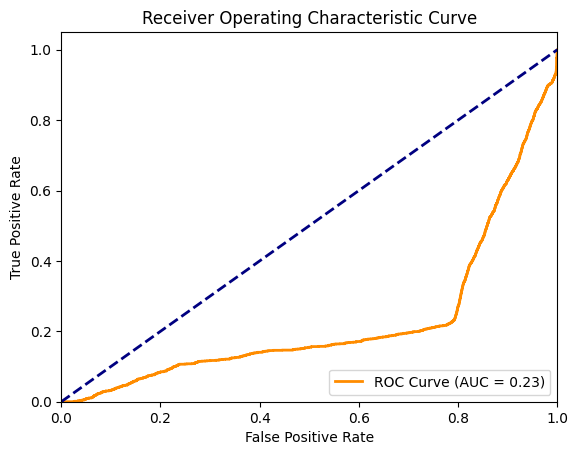

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
# Calculate the precision-recall curve
precision, recall, _ = precision_recall_curve(y_cv, model.predict(x_cv))

# Calculate the PR AUC
pr_auc = auc(recall, precision)

# Plot the PR curve
plt.figure()
lw = 2
plt.plot(recall, precision, color="darkorange", lw=lw, label="PR Curve (AUC = %0.2f)" % pr_auc)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_cv, model.predict(x_cv))

# Calculate the ROC AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC Curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

We can see that the neural network is not working very well, so it is a bad model for our dataset.

Now, we will use SVM

As the dataset is very large, SVM will not be a good choice for our model as it works very slow. It is one of the best model for small to moderate sized dataset.

In [ ]:
# prompt: implement SVM

from sklearn.svm import SVC

# Create an SVM classifier
svm = SVC(kernel='linear', C=1.0)

# Train the model
svm.fit(x_train, y_train)

# Make predictions on the cross-validation set
y_pred_svm = svm.predict(x_cv)

# Calculate the accuracy score
accuracy_svm = accuracy_score(y_cv, y_pred_svm)
print("Accuracy of SVM model:", accuracy_svm)

# Calculate the confusion matrix
cm = confusion_matrix(y_cv, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Calculate the precision-recall curve
precision, recall, _ = precision_recall_curve(y_cv, svm.predict_proba(x_cv)[:, 1])

# Calculate the PR AUC
pr_auc = auc(recall, precision)

# Plot the PR curve
plt.figure()
lw = 2
plt.plot(recall, precision, color="darkorange", lw=lw, label="PR Curve (AUC = %0.2f)" % pr_auc)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_cv, svm.predict_proba(x_cv)[:, 1])

# Calculate the ROC AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC Curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

# Calculate the error on the train and test sets
error_train = np.mean(np.abs(y_train - svm.predict(x_train)))
error_cv = np.mean(np.abs(y_cv - svm.predict(x_cv)))

# Print the errors
print("Error on training set:", error_train)
print("Error on cross-validation set:", error_cv)


From all the above models, we can see that XGBoost is working best.